# 📘 Linear Regression 线性回归

## 一、模型简介

线性回归是一种最基本的回归模型， 回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。
在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。
常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。

### ✅ 主要特点
- 易于解释，模型可视化
- 可加正则化（Ridge / Lasso）
- 假设线性关系，抗噪性较差

---

## 二、数学原理（Linear Regression）

---

### 🧩 1. 问题定义

我们有一组训练数据：

$$
\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)})\}
$$

其中：

- $x^{(i)} \in \mathbb{R}^n$：第 $i$ 个样本的输入特征（可多维）
- $y^{(i)} \in \mathbb{R}$：第 $i$ 个样本的目标值（真实输出）

---

### 📈 2. 模型假设（Hypothesis Function）

我们假设输入与输出之间存在线性关系：

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n = \boldsymbol{\theta}^T \boldsymbol{x}
$$

其中：

- $x = [1, x_1, x_2, \dots, x_n]^T$：加了偏置项的输入向量
- ${\theta} = [\theta_0, \theta_1, \dots, \theta_n]^T$：模型参数向量

---

### 🎯 3. 损失函数（Loss Function）

我们希望预测值 $\hat{y}$ 尽可能接近真实值 $y$，因此定义均方误差（MSE）作为损失函数：

$$
\hat{y} = \sum_{i=0}^{n} \theta_i x_i = \boldsymbol{\theta}^T \boldsymbol{x}
$$



其中 $h_\theta(x^{(i)})$ 是第 $i$ 个样本的预测值。

> 为什么要除以 2？为了在梯度下降中求导简化公式。

---

### 🧮 4. 求解方法（两种）

#### ✅ 4.1 解析解（Normal Equation）

在特征矩阵 $X$ 满足可逆条件时，可以直接解出参数：

$$
{\theta} = (X^T X)^{-1} X^T y
$$

其中：

- $X \in \mathbb{R}^{m \times (n+1)}$：带有偏置项的特征矩阵
- $y \in \mathbb{R}^{m \times 1}$：目标值列向量

适合特征维度较小、样本数量不大的情况。

---

#### ✅ 4.2 梯度下降法（Gradient Descent）

使用迭代法反复更新参数来最小化损失函数：

**单个参数的更新公式：**

$$
\theta_j := \theta_j - \eta \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$$

**导数计算：**

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

**更新总结公式：**

$$
\theta_j := \theta_j - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

其中：

- $\eta$：学习率，控制每次更新的步长大小

---

### 📐 5. 几何解释

每一组 $(x, y)$ 是一个数据点，线性回归试图找到一个**超平面**，使得所有点到该平面的垂直距离平方和最小（最小二乘意义下的最优拟合）。

> 残差 = 实际值 − 预测值

---

### 📌 6. 为什么叫最小二乘法（OLS）

线性回归也叫普通最小二乘法（Ordinary Least Squares, OLS），它的目标就是最小化所有残差的平方和：

$$
\sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2
$$

这是最常用的误差度量方式，尤其在误差服从高斯分布时非常有效。

---

In [1]:
import numpy as np
import pandas as pd
import sklearn


用House_price dataset 来做regression

In [2]:
train_path = "../../regression_data/house_price/train.csv"
test_path = "../../regression_data/house_price/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
#通过 Correlation 矩阵挑选feature
correlation = df_train.select_dtypes(include=['number']).corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [4]:
from sklearn.model_selection import train_test_split

selected_features = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"
]
X= df_train[selected_features]
y = df_train["SalePrice"]


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



Method1 直接使用 sklearn库构建regression model

In [5]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation R² Score: {r2:.4f}")



Validation MSE: 1565677639.14
Validation R² Score: 0.7959


同时对比L2正则

In [7]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0], cv=10)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)
print("R²:", ridge_cv.score(X_val, y_val))

Best alpha: 100.0
R²: 0.7958113705610118


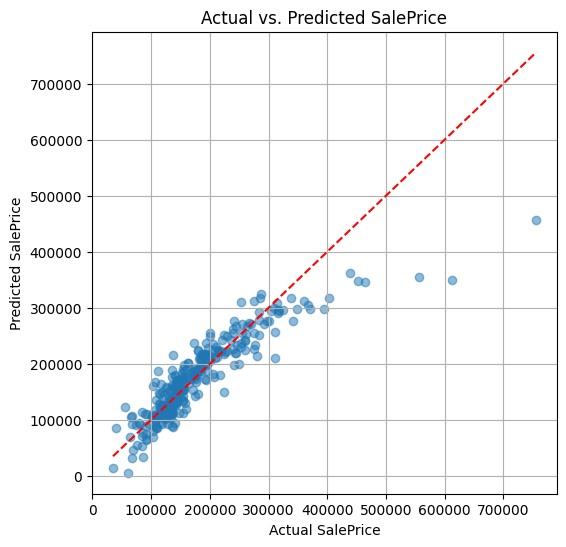

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.grid(True)
plt.show()


Method 2 手撕

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

class LinearRegression:
    def __init__(self) -> None:
        self.w = None              # 参数向量 θ（含 bias）
        self.coef_ = None          # 特征系数（不含 bias）
        self.intercept_ = None     # 截距项（bias）
        self.last_loss = None      # 最终损失（MSE）

    def fit(self, x_train, y_train):
        """使用解析解 (Normal Equation) 拟合线性回归模型"""
        one = np.ones(shape=(len(x_train), 1))
        x_train_b = np.concatenate([one, x_train], axis=1)
        w = np.linalg.inv(x_train_b.T @ x_train_b) @ x_train_b.T @ y_train

        self.w = w
        self.coef_ = w[1:]
        self.intercept_ = w[0]

        # 计算训练集上的最终损失（MSE）
        y_pred = x_train_b @ w
        self.last_loss = mean_squared_error(y_train, y_pred)

    def predict(self, x_test):
        """对测试数据进行预测"""
        one = np.ones(shape=(len(x_test), 1))
        x_test_b = np.concatenate([one, x_test], axis=1)
        y_pred = x_test_b @ self.w.T
        return y_pred

    def score(self, x_test, y_true):
        """计算 R²（决定系数）"""
        y_pred = self.predict(x_test)
        return r2_score(y_true, y_pred)

    def mse(self, x_test, y_true):
        """计算 MSE（均方误差）"""
        y_pred = self.predict(x_test)
        return mean_squared_error(y_true, y_pred)

    def plot_prediction(self, x_test, y_true):
        """绘制实际 vs 预测的散点图"""
        y_pred = self.predict(x_test)
        plt.figure(figsize=(6, 6))
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")
        plt.title("Prediction vs Actual")
        plt.grid(True)
        plt.show()

    def print_model_summary(self, x_val, y_val):
        """打印模型训练情况摘要"""
        print("Intercept (bias):", self.intercept_)
        print("Coefficients:", self.coef_)
        print("Final Train Loss (MSE):", self.last_loss)
        print("Validation MSE:", self.mse(x_val, y_val))
        print("Validation R²:", self.score(x_val, y_val))


Intercept (bias): -786209.2009146081
Coefficients: [ 2.09439153e+04  4.83021547e+01  1.16114886e+04  1.34026577e+01
  1.44480354e+01  1.41557748e+01 -5.43977295e+03  3.07624322e+02
  3.61883304e+02]
Final Train Loss (MSE): 1427639214.158299
Validation MSE: 1565677639.145863
Validation R²: 0.7958786110454055


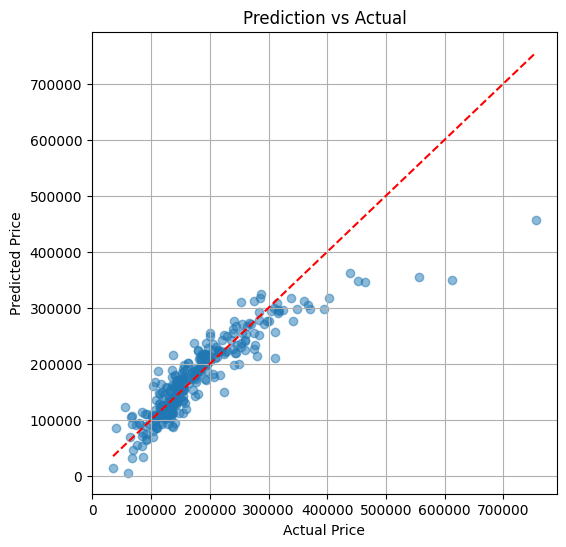

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
model.print_model_summary(X_val, y_val)
model.plot_prediction(X_val, y_val)


同样加入Ridge

In [13]:
class LinearRegressionRidge:
    def __init__(self, lambda_=100.0):
        """
        Ridge 回归解析解（带 L2 正则）

        参数:
        - lambda_: 正则强度（L2 惩罚项系数）
        """
        self.lambda_ = lambda_
        self.w = None
        self.coef_ = None
        self.intercept_ = None
        self.last_loss = None

    def fit(self, x_train, y_train):
        m, n = x_train.shape
        one = np.ones((m, 1))
        x_train_b = np.concatenate([one, x_train], axis=1)

        # 构造 L2 正则项 (λ * I)，不对 bias 加正则
        L2_identity = np.eye(n + 1)
        L2_identity[0, 0] = 0  # 截距项不正则化

        # 解析解：θ = (XᵀX + λI)^(-1) Xᵀy
        A = x_train_b.T @ x_train_b + self.lambda_ * L2_identity
        b = x_train_b.T @ y_train
        w = np.linalg.inv(A) @ b

        self.w = w
        self.intercept_ = w[0]
        self.coef_ = w[1:]

        # 保存训练误差（MSE）
        y_pred = x_train_b @ w
        self.last_loss = mean_squared_error(y_train, y_pred)

    def predict(self, x_test):
        one = np.ones((len(x_test), 1))
        x_test_b = np.concatenate([one, x_test], axis=1)
        return x_test_b @ self.w.T

    def score(self, x_test, y_true):
        return r2_score(y_true, self.predict(x_test))

    def mse(self, x_test, y_true):
        return mean_squared_error(y_true, self.predict(x_test))

    def print_model_summary(self, x_val, y_val):
        print(f"λ (L2 penalty): {self.lambda_}")
        print("Intercept (bias):", self.intercept_)
        print("Coefficients:", self.coef_)
        print("Final Train Loss (MSE):", self.last_loss)
        print("Validation MSE:", self.mse(x_val, y_val))
        print("Validation R²:", self.score(x_val, y_val))


In [14]:
model_ridge = LinearRegressionRidge(lambda_=100)
model_ridge.fit(X_train, y_train)
model_ridge.print_model_summary(X_val, y_val)


λ (L2 penalty): 100
Intercept (bias): -841973.6097102165
Coefficients: [ 1.90146822e+04  4.95897965e+01  6.72066234e+03  2.85892688e+01
  1.59196599e+01  1.31048201e+01 -2.88161988e+03  2.45034157e+02
  3.93913925e+02]
Final Train Loss (MSE): 1434225445.60992
Validation MSE: 1566193395.593303
Validation R²: 0.7958113705612971
